# Replica project

### Embedding visualization

In [1]:
# loading the metadata
%load_ext autoreload
%autoreload 2

import pandas as pd

from tqdm import tqdm
import torch

from glob import glob

from utils import *
from metrics import *
from model_replica import ReplicaNet

import numpy as np

from store_embeddings import *
from utils import * 

path = '/home/guhennec/scratch/2021_Cini/TopologicalAnalysis_Cini/data/'
data_dir = '/scratch/students/schaerf/'



2022-03-30 11:25:14.246438: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
data = pd.read_csv(data_dir + 'full_data.csv').drop(columns=['Unnamed: 0', 'level_0'])
print(data.shape)
data.head()

(6163, 45)


uid_connection  index                               uid  \
0  002ca9c06a704c779e69d93cb4fadaa3    649  45588b4e33444ed8b34c523bac808bc4   
1  0038ab462149452b98a4d7359a06f9f4   1571  ae828b07e4284d80b652206ffb77278a   
2  00474897de044f7fb1ef16888dc198f3   1107  76b2c4aeab404bc79768117e3ddc62b1   
3  009c03c265b8418495da038bc3826bf7   1764  c5839e5220e5419e92d878396b0c04bb   
4  00aeddb93a8a4120aa984eda6c822747    747  4d02860f58f2443ba4d1ef088756f854   

  Drawer ImageNumber                         Author  \
0   158B         556    TIZIANO Vecellio (copia da)   
1   158C         120    TIZIANO Vecellio (copia da)   
2    47A         858  BELLINI Giovanni (cerchia di)   
3   135C          57                     SEC XVI ex   
4    21C         228                BASSANO Leandro   

                                    Description  \
0               S.Mariá Maddalena. cm. 123 x 91   
1  Morte di S. Pietro Martire. mm. 123,8 x 84,2   
2                                        Pietà.   
3          Un soffitto. Part.: Leda e il cigno.   
4  La preparazione del pranzo. cm. 88,3 x 102,9   

                     AuthorOriginal    AuthorULANLabel      AuthorULAN  ...  \
0              TIZIANO (copia da -)             Titian  ulan:500031075  ...   
1              TIZIANO (copia da -)             Titian  ulan:500031075  ...   
2  BELLINI, Giovanni (cerchia di -)  Bellini, Giovanni  ulan:500019244  ...   
3                      SEC. XVI ex.                NaN             NaN  ...   
4                 BASSANO, Leandro.   Bassano, Leandro  ulan:500015945  ...   

      AuthorBirthCity  AuthorDeathCity  \
0             Belluno           Venice   
1             Belluno           Venice   
2              Venice           Venice   
3                 NaN              NaN   
4  Bassano del Grappa           Venice   

                                        CardboardURL  \
0  https://dhlabsrv4.epfl.ch/iiif_cini/158B%2F158...   
1  https://dhlabsrv4.epfl.ch/iiif_cini/158C%2F158...   
2  https://dhlabsrv4.epfl.ch/iiif_cini/47A%2F47A_...   
3  https://dhlabsrv4.epfl.ch/iiif_cini/135C%2F135...   
4  https://dhlabsrv4.epfl.ch/iiif_cini/21C%2F21C_...   

                                            ImageURL  \
0  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...   
1  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...   
2  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...   
3  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...   
4  https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...   

                               img1                              img2  \
0  45588b4e33444ed8b34c523bac808bc4  da54c106180449d1a52993e9a5bc17fd   
1  ae828b07e4284d80b652206ffb77278a  ea64207684694d379579998f88b7c29a   
2  76b2c4aeab404bc79768117e3ddc62b1  b8dd2c0c2c7146e68e5bbb0aaf6cf803   
3  450ee2aceb014709b23a93e1163937c5  c5839e5220e5419e92d878396b0c04bb   
4  4d02860f58f2443ba4d1ef088756f854  27bad0f213a342c3987e8cec61e40550   

       type                         annotated cluster    set  
0  POSITIVE  2018-07-24 14:58:44.559049+00:00    50.0  train  
1  POSITIVE  2018-07-16 09:47:57.987515+00:00    51.0   test  
2  POSITIVE  2018-03-14 10:46:45.603341+00:00   498.0   test  
3  POSITIVE  2018-05-07 08:28:11.797723+00:00    92.0  train  
4  POSITIVE  2018-03-23 15:41:53.094226+00:00   218.0  train  

[5 rows x 45 columns]

In [3]:
list_downloaded = [
    file.split("/")[-1].split(".")[0] for file in glob(data_dir + "subset/*")
]
print(len(list_downloaded))

train_test = data[data["set"].notnull()].reset_index() #[data['img1'].isin(list_downloaded)][data['img2'].isin(list_downloaded)]
print(train_test.shape)


4593
(2862, 46)


In [4]:
embeddings = np.load(
                    data_dir + 'resnext-101_avg_480' + ".npy",
                    allow_pickle=True,
                )        
                

/tmp/ipykernel_2245310/3743059868.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  show_similars(train_test[train_test['set'] == 'test'][train_test['uid'].isin(list_downloaded)].sample(), embeddings, train_test, data)


reference image 0ad5a05546ae4b4b9bfee2259e9b3936 (copia aa- Sacra Faniglia.


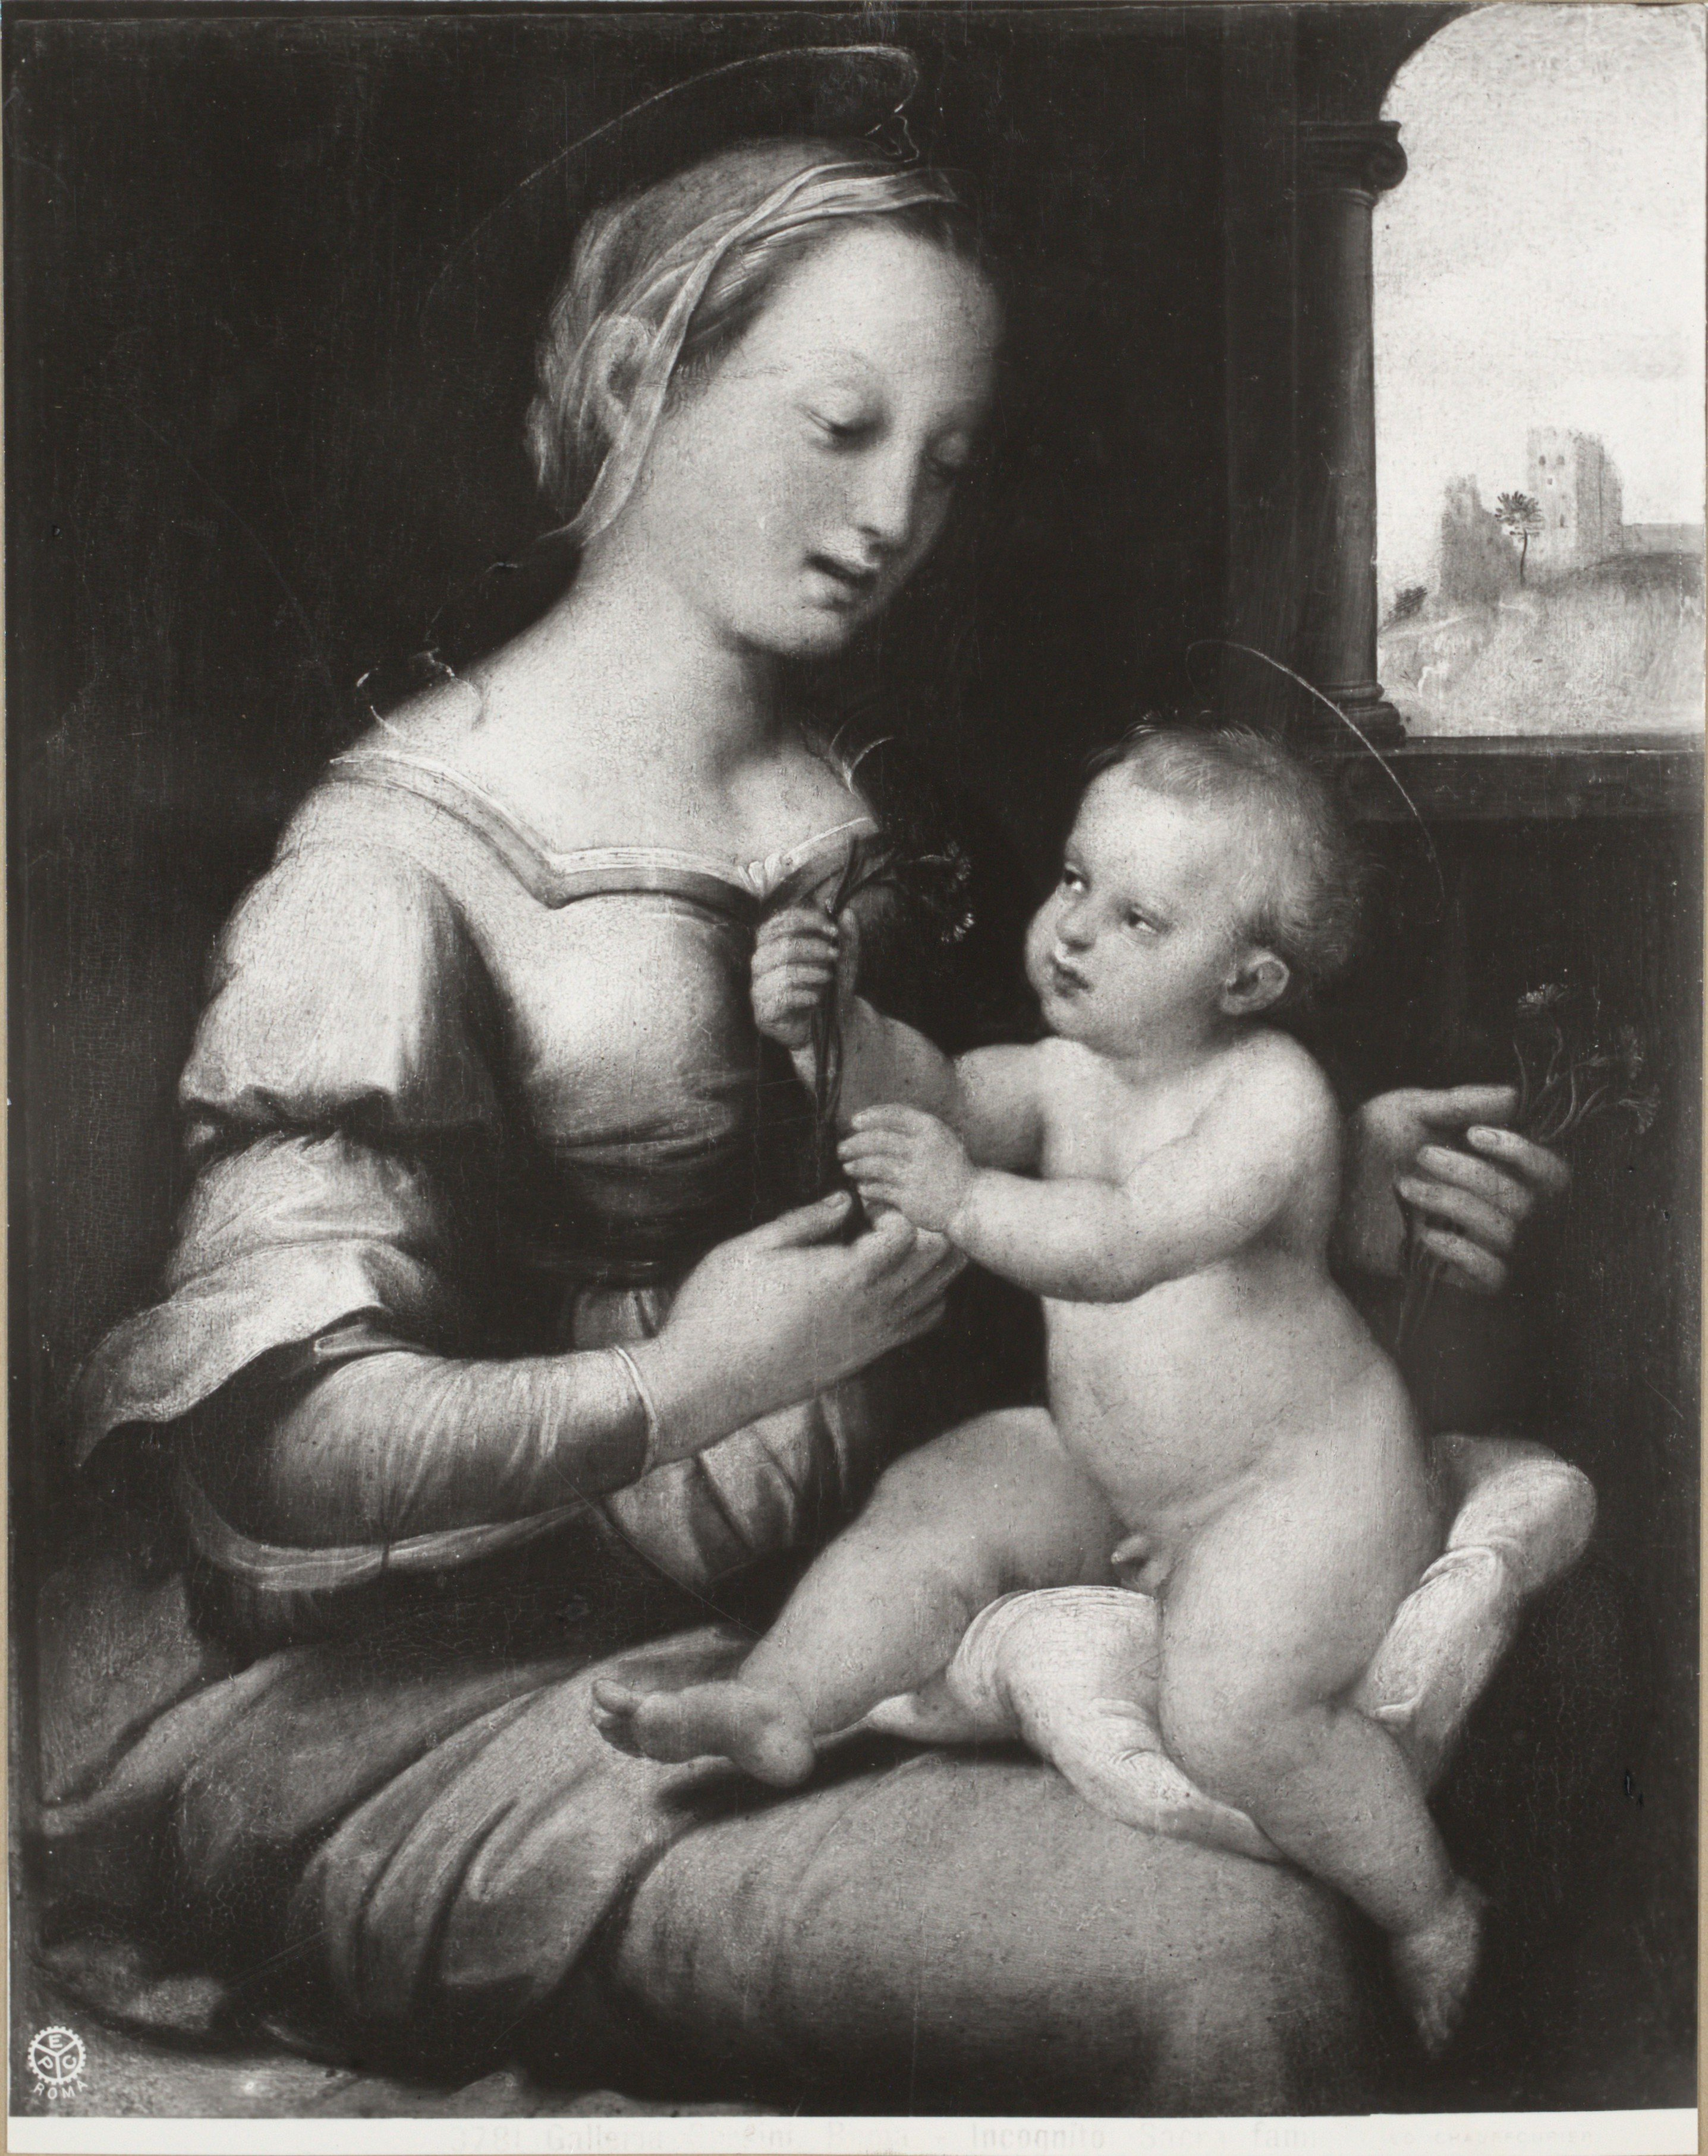

actual most similar image 30e42264670744019db1c1ba59ff3032


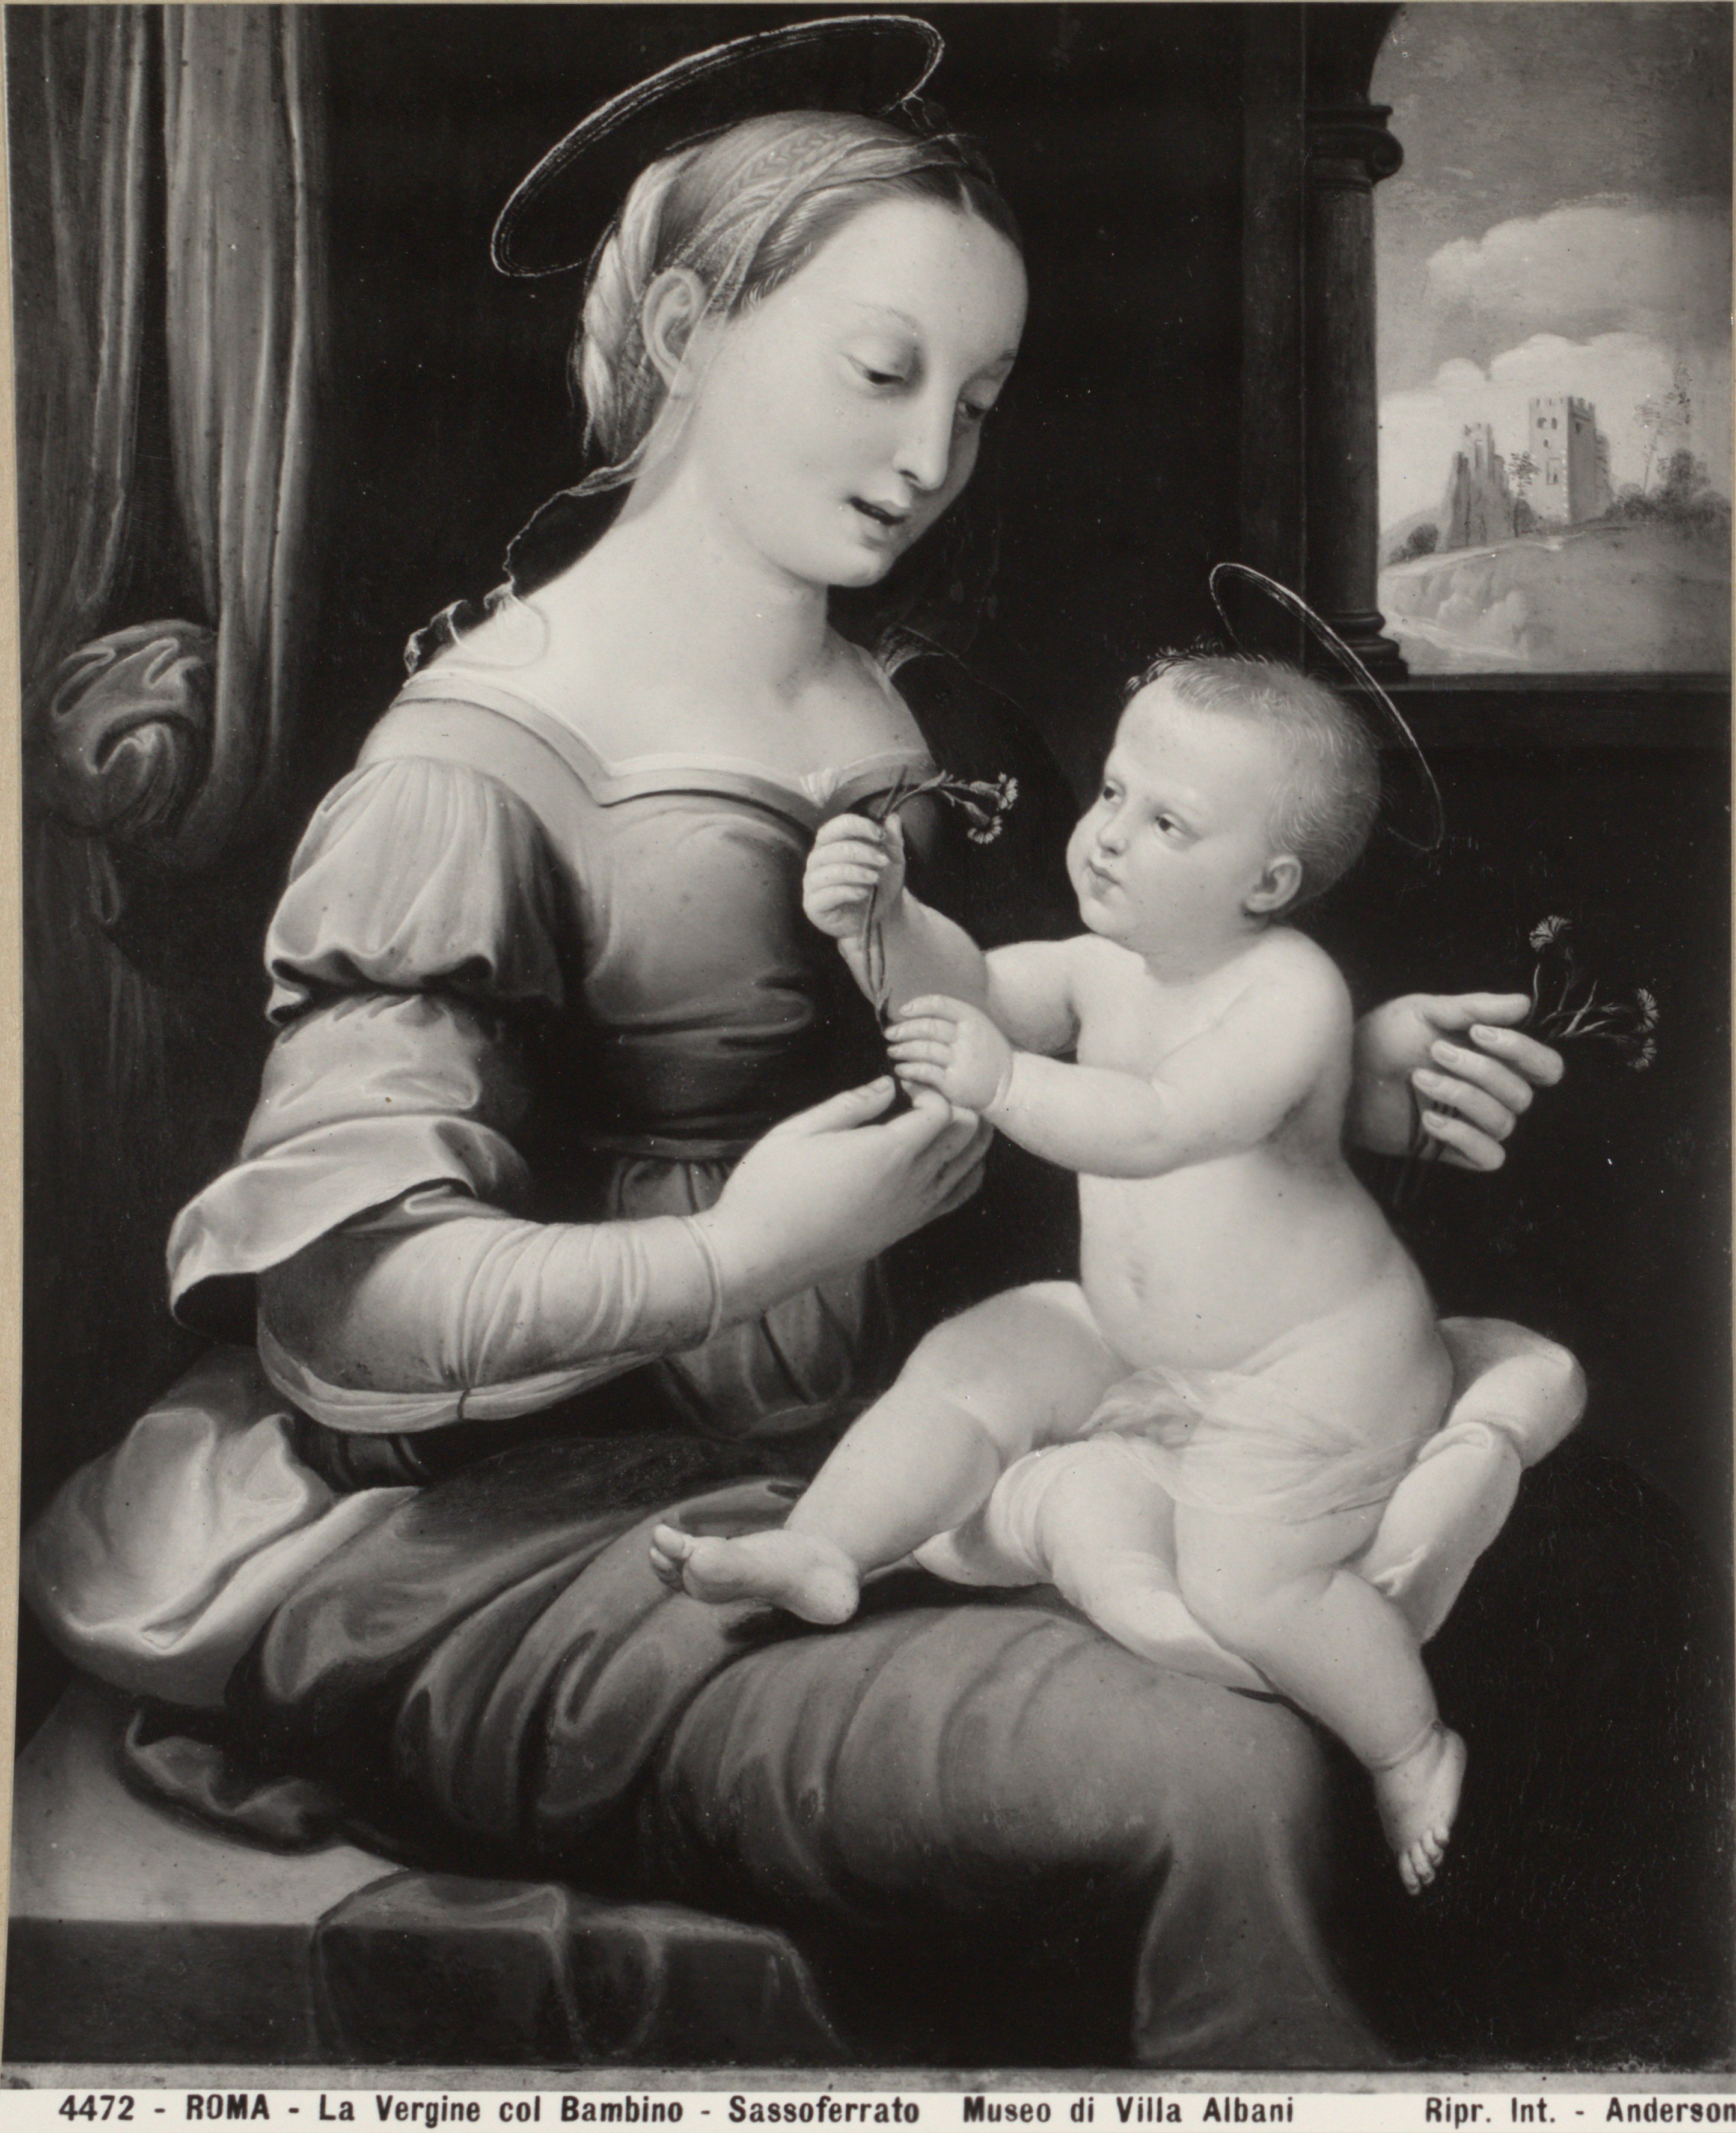

1 th most similar image according to model cdd6ac8b2c6b43e78879727f7601b85f


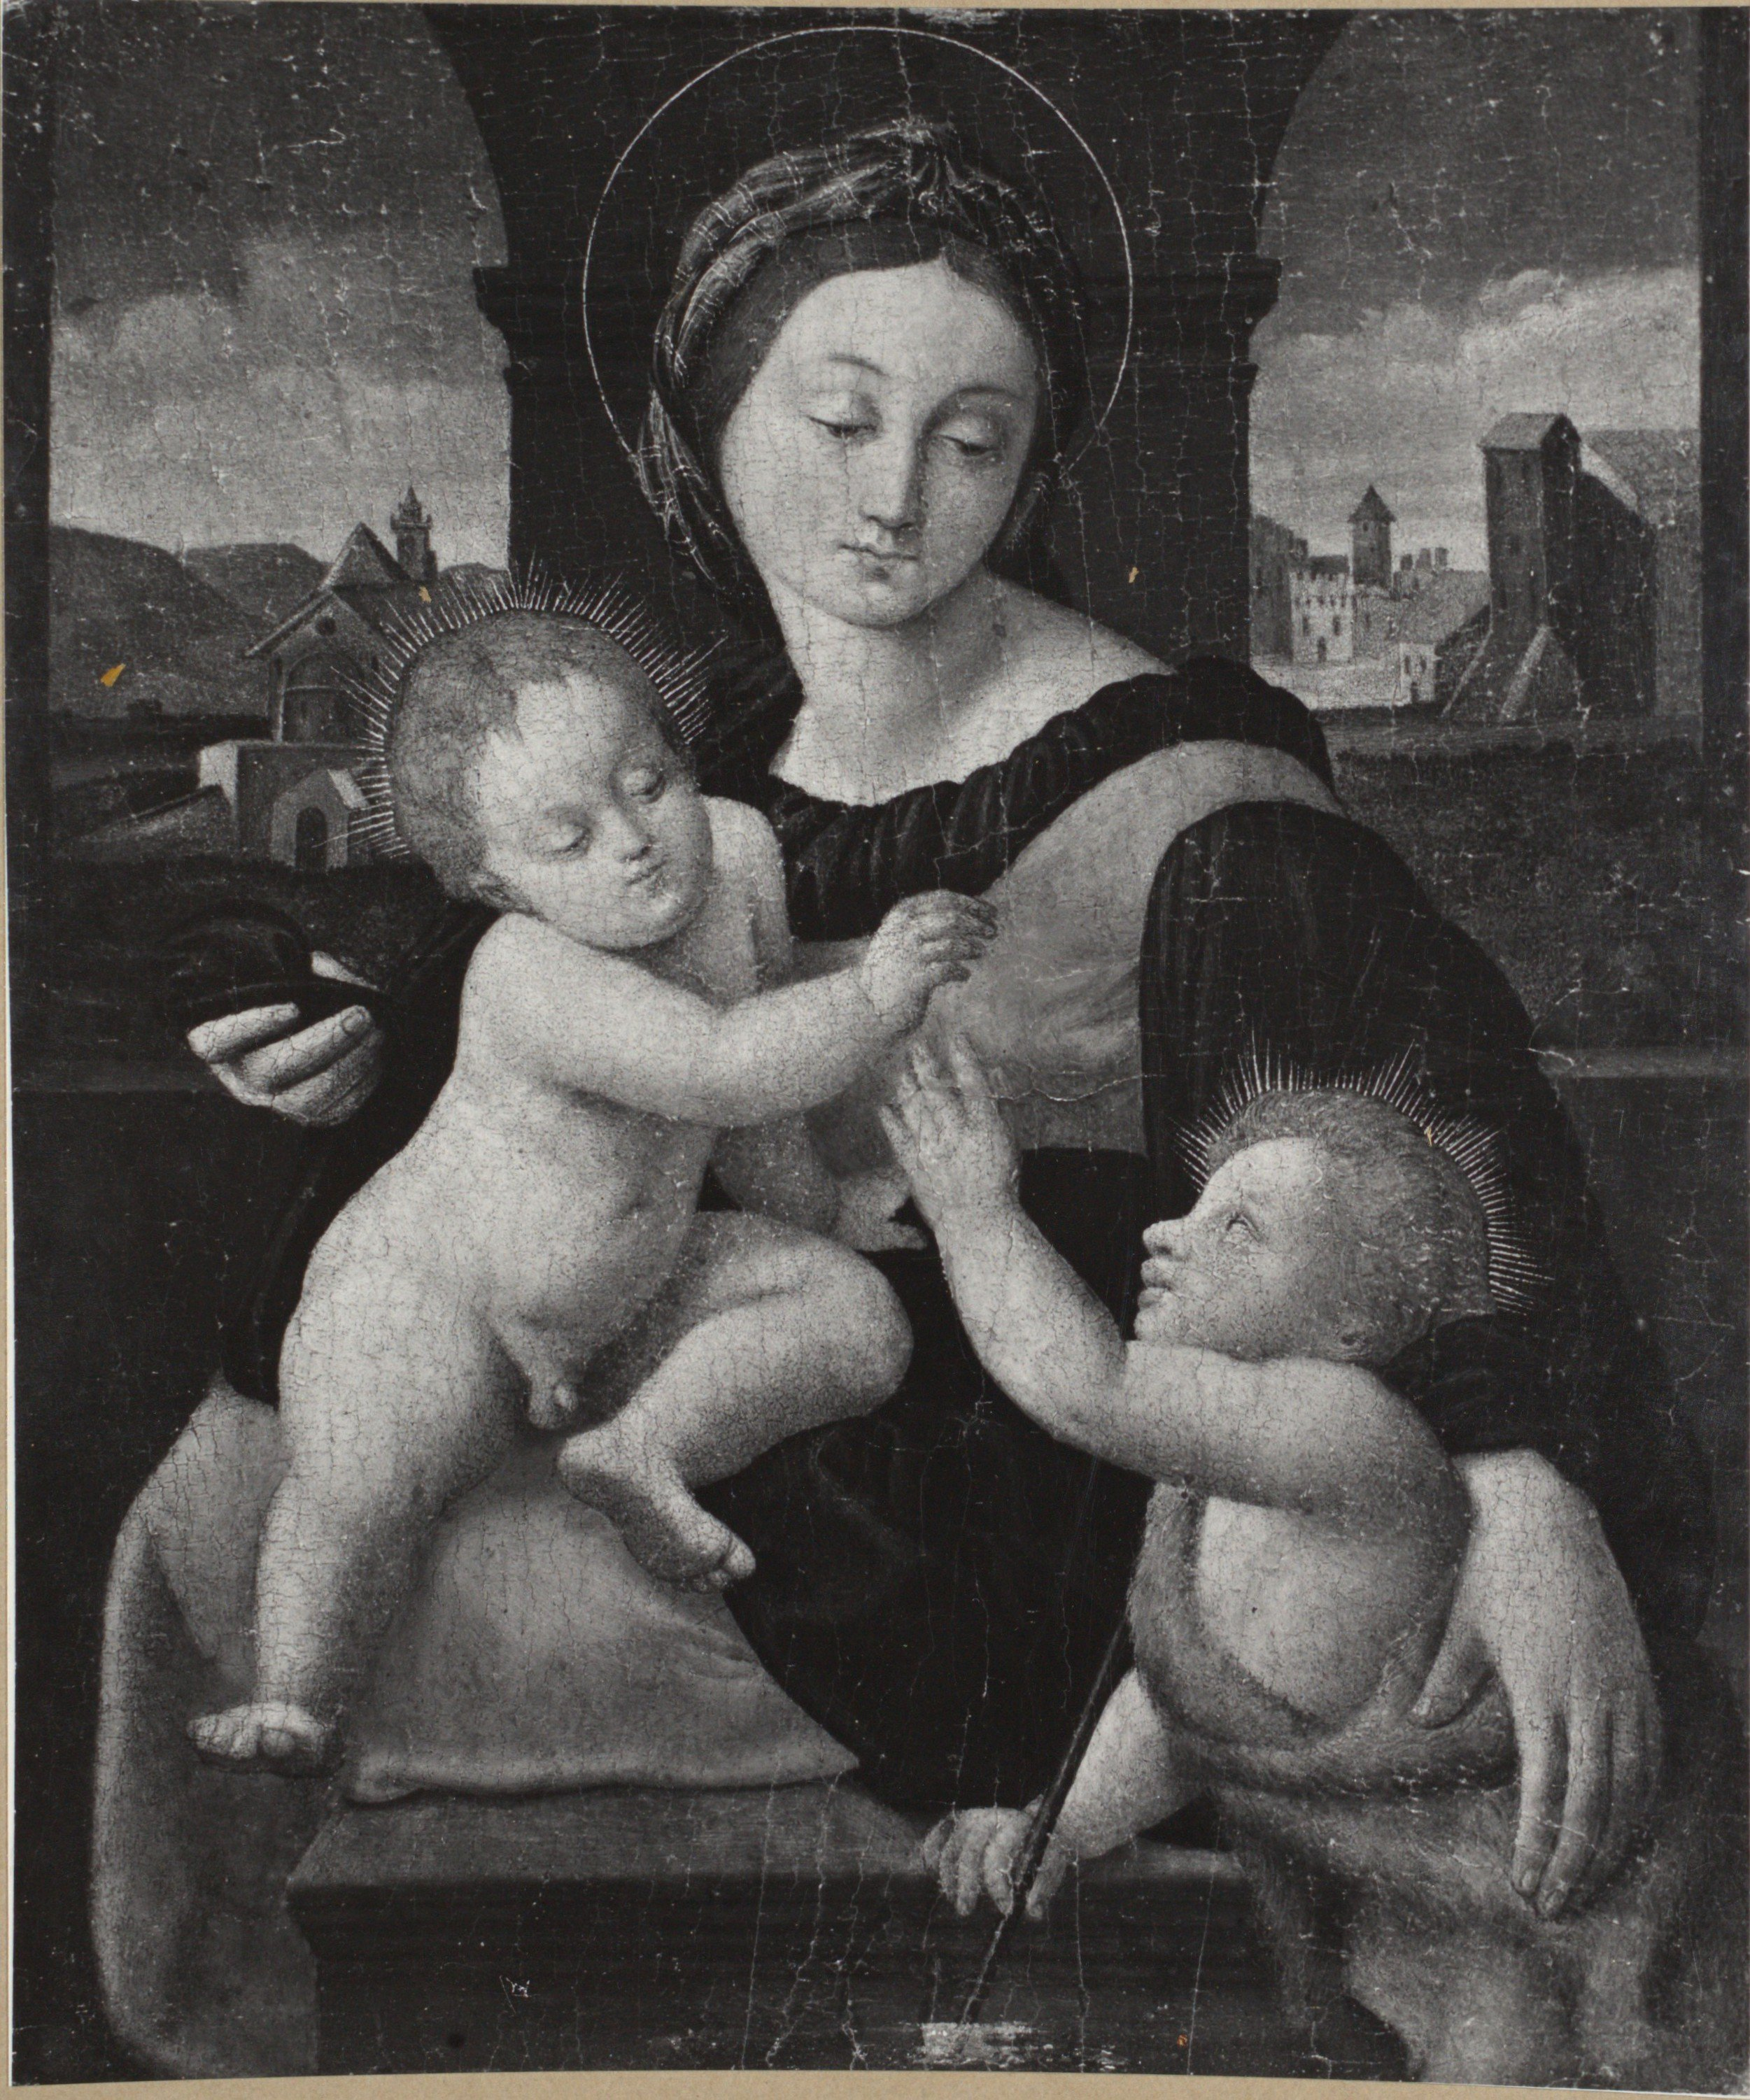

2 th most similar image according to model d06c6467e81b457c8b7aa54233859d57


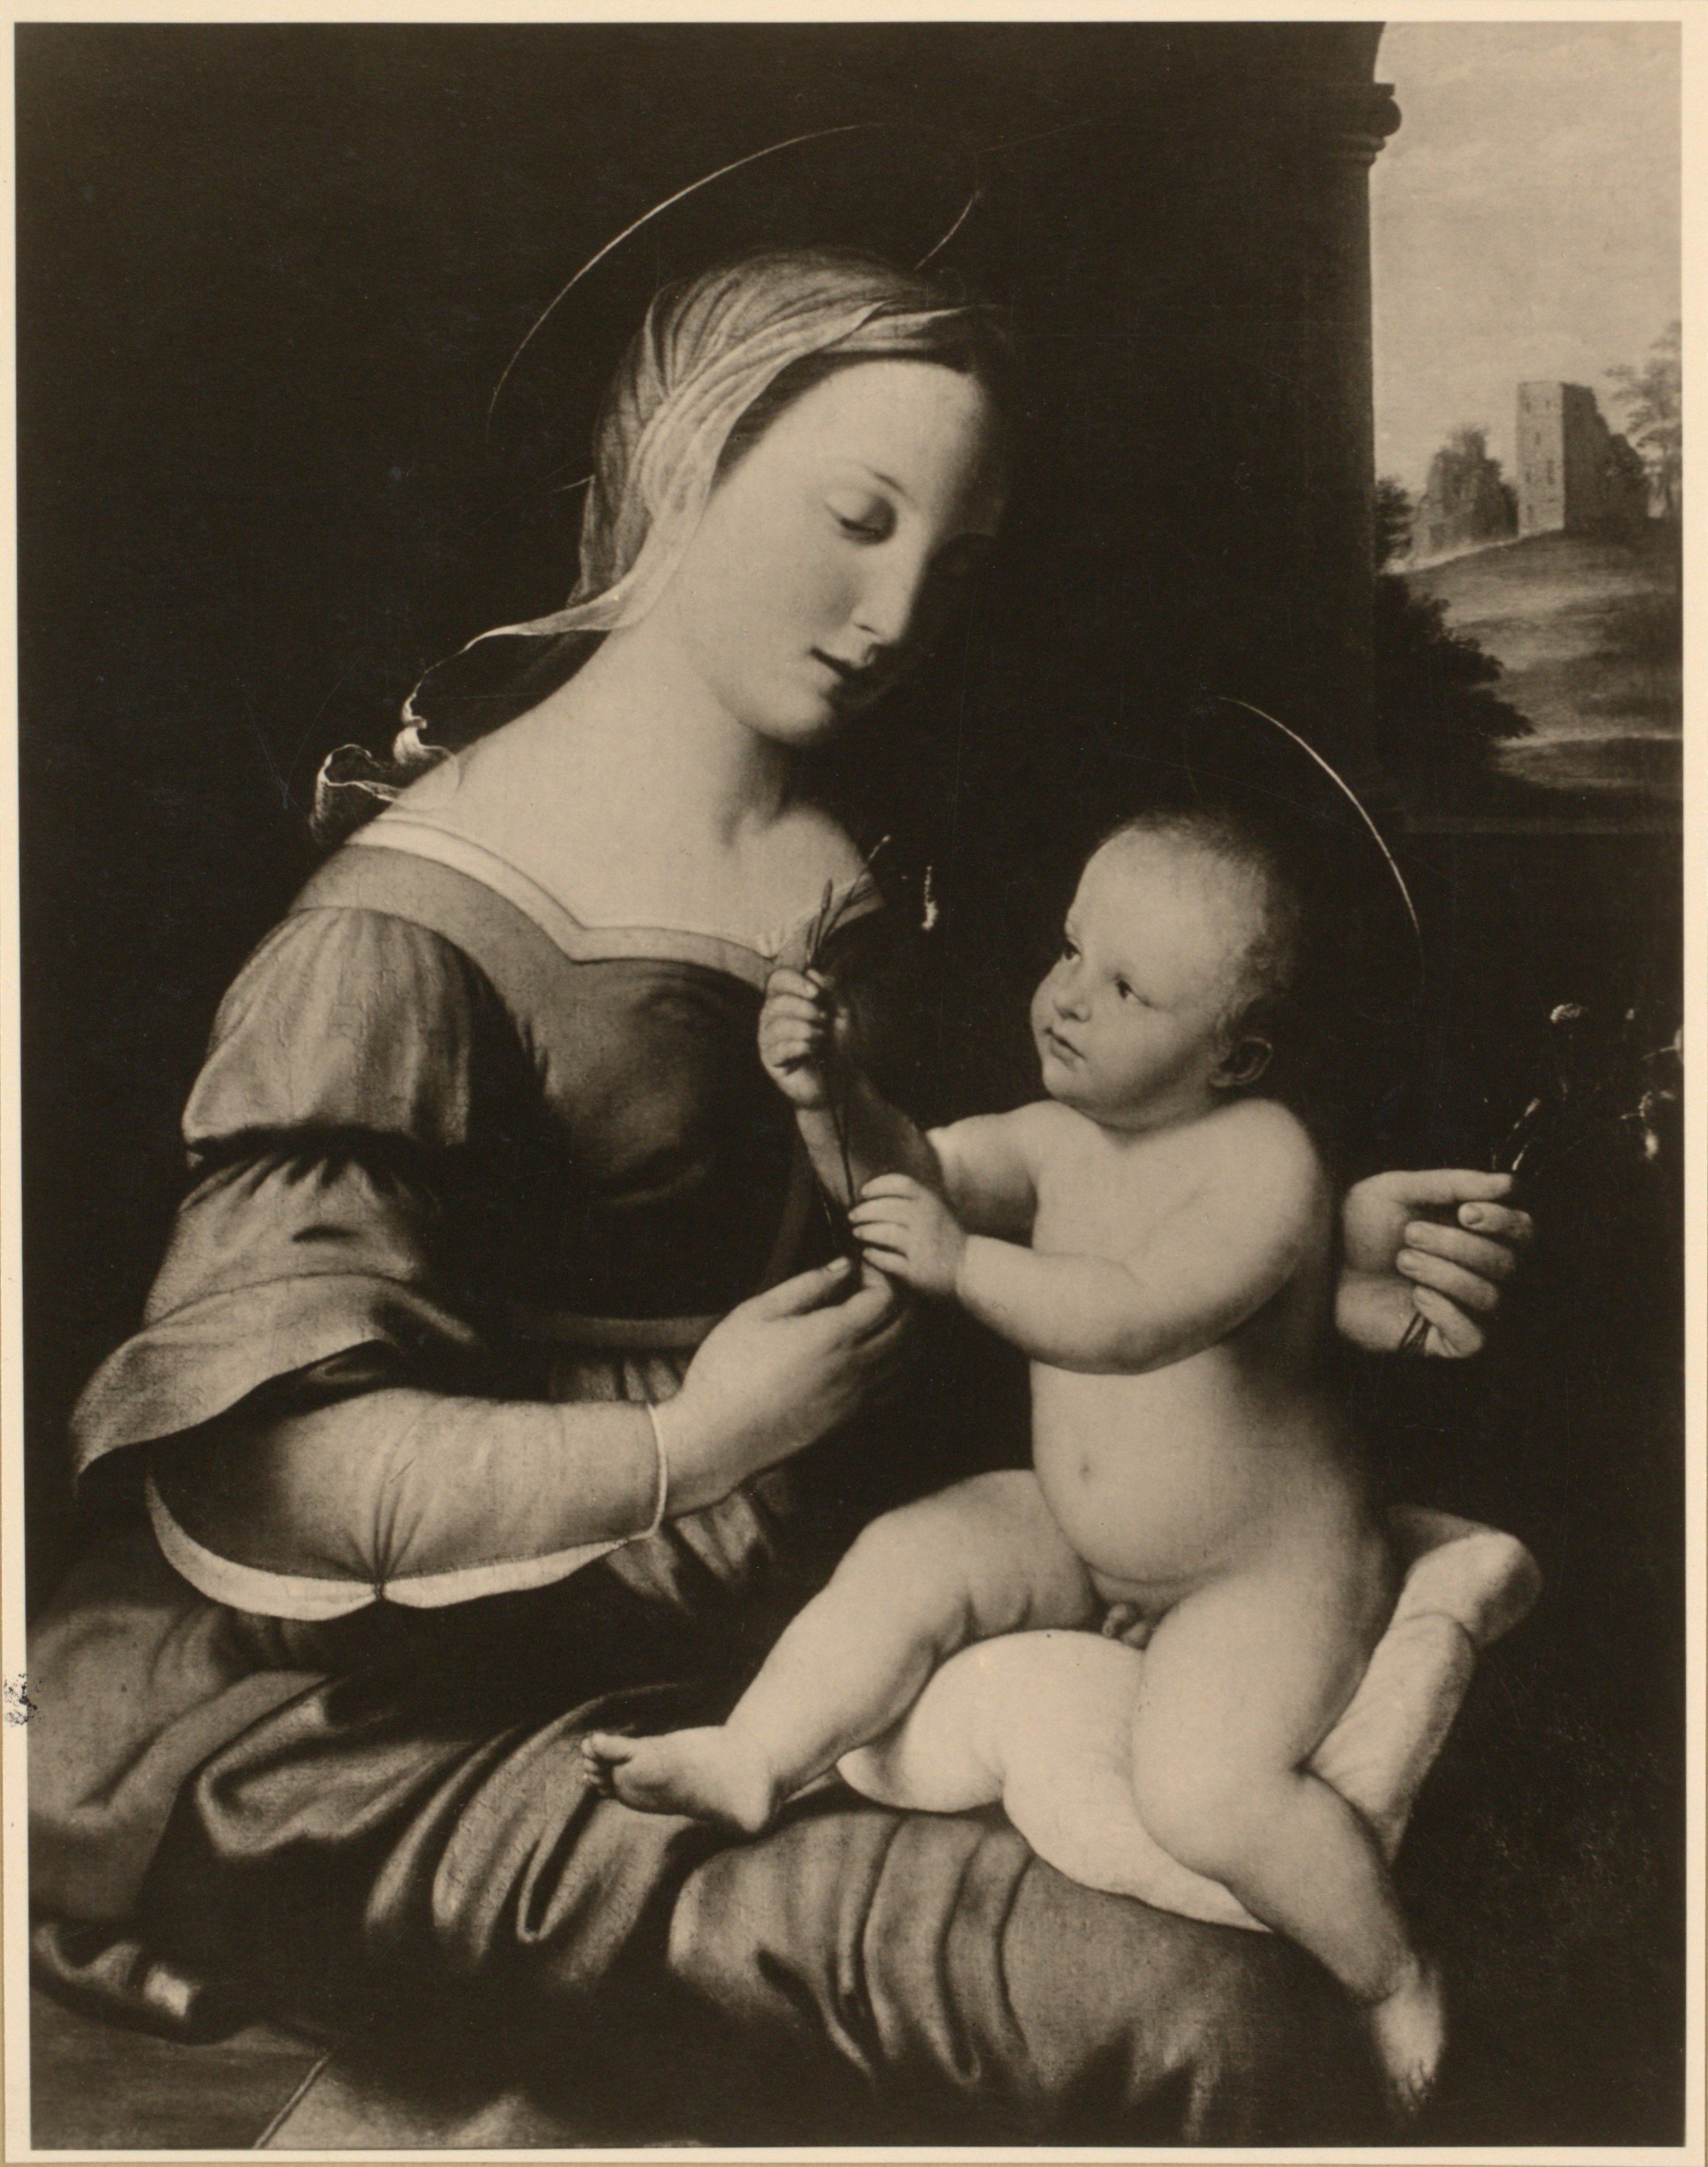

3 th most similar image according to model fa837495e2fd463590019430757e4cd8


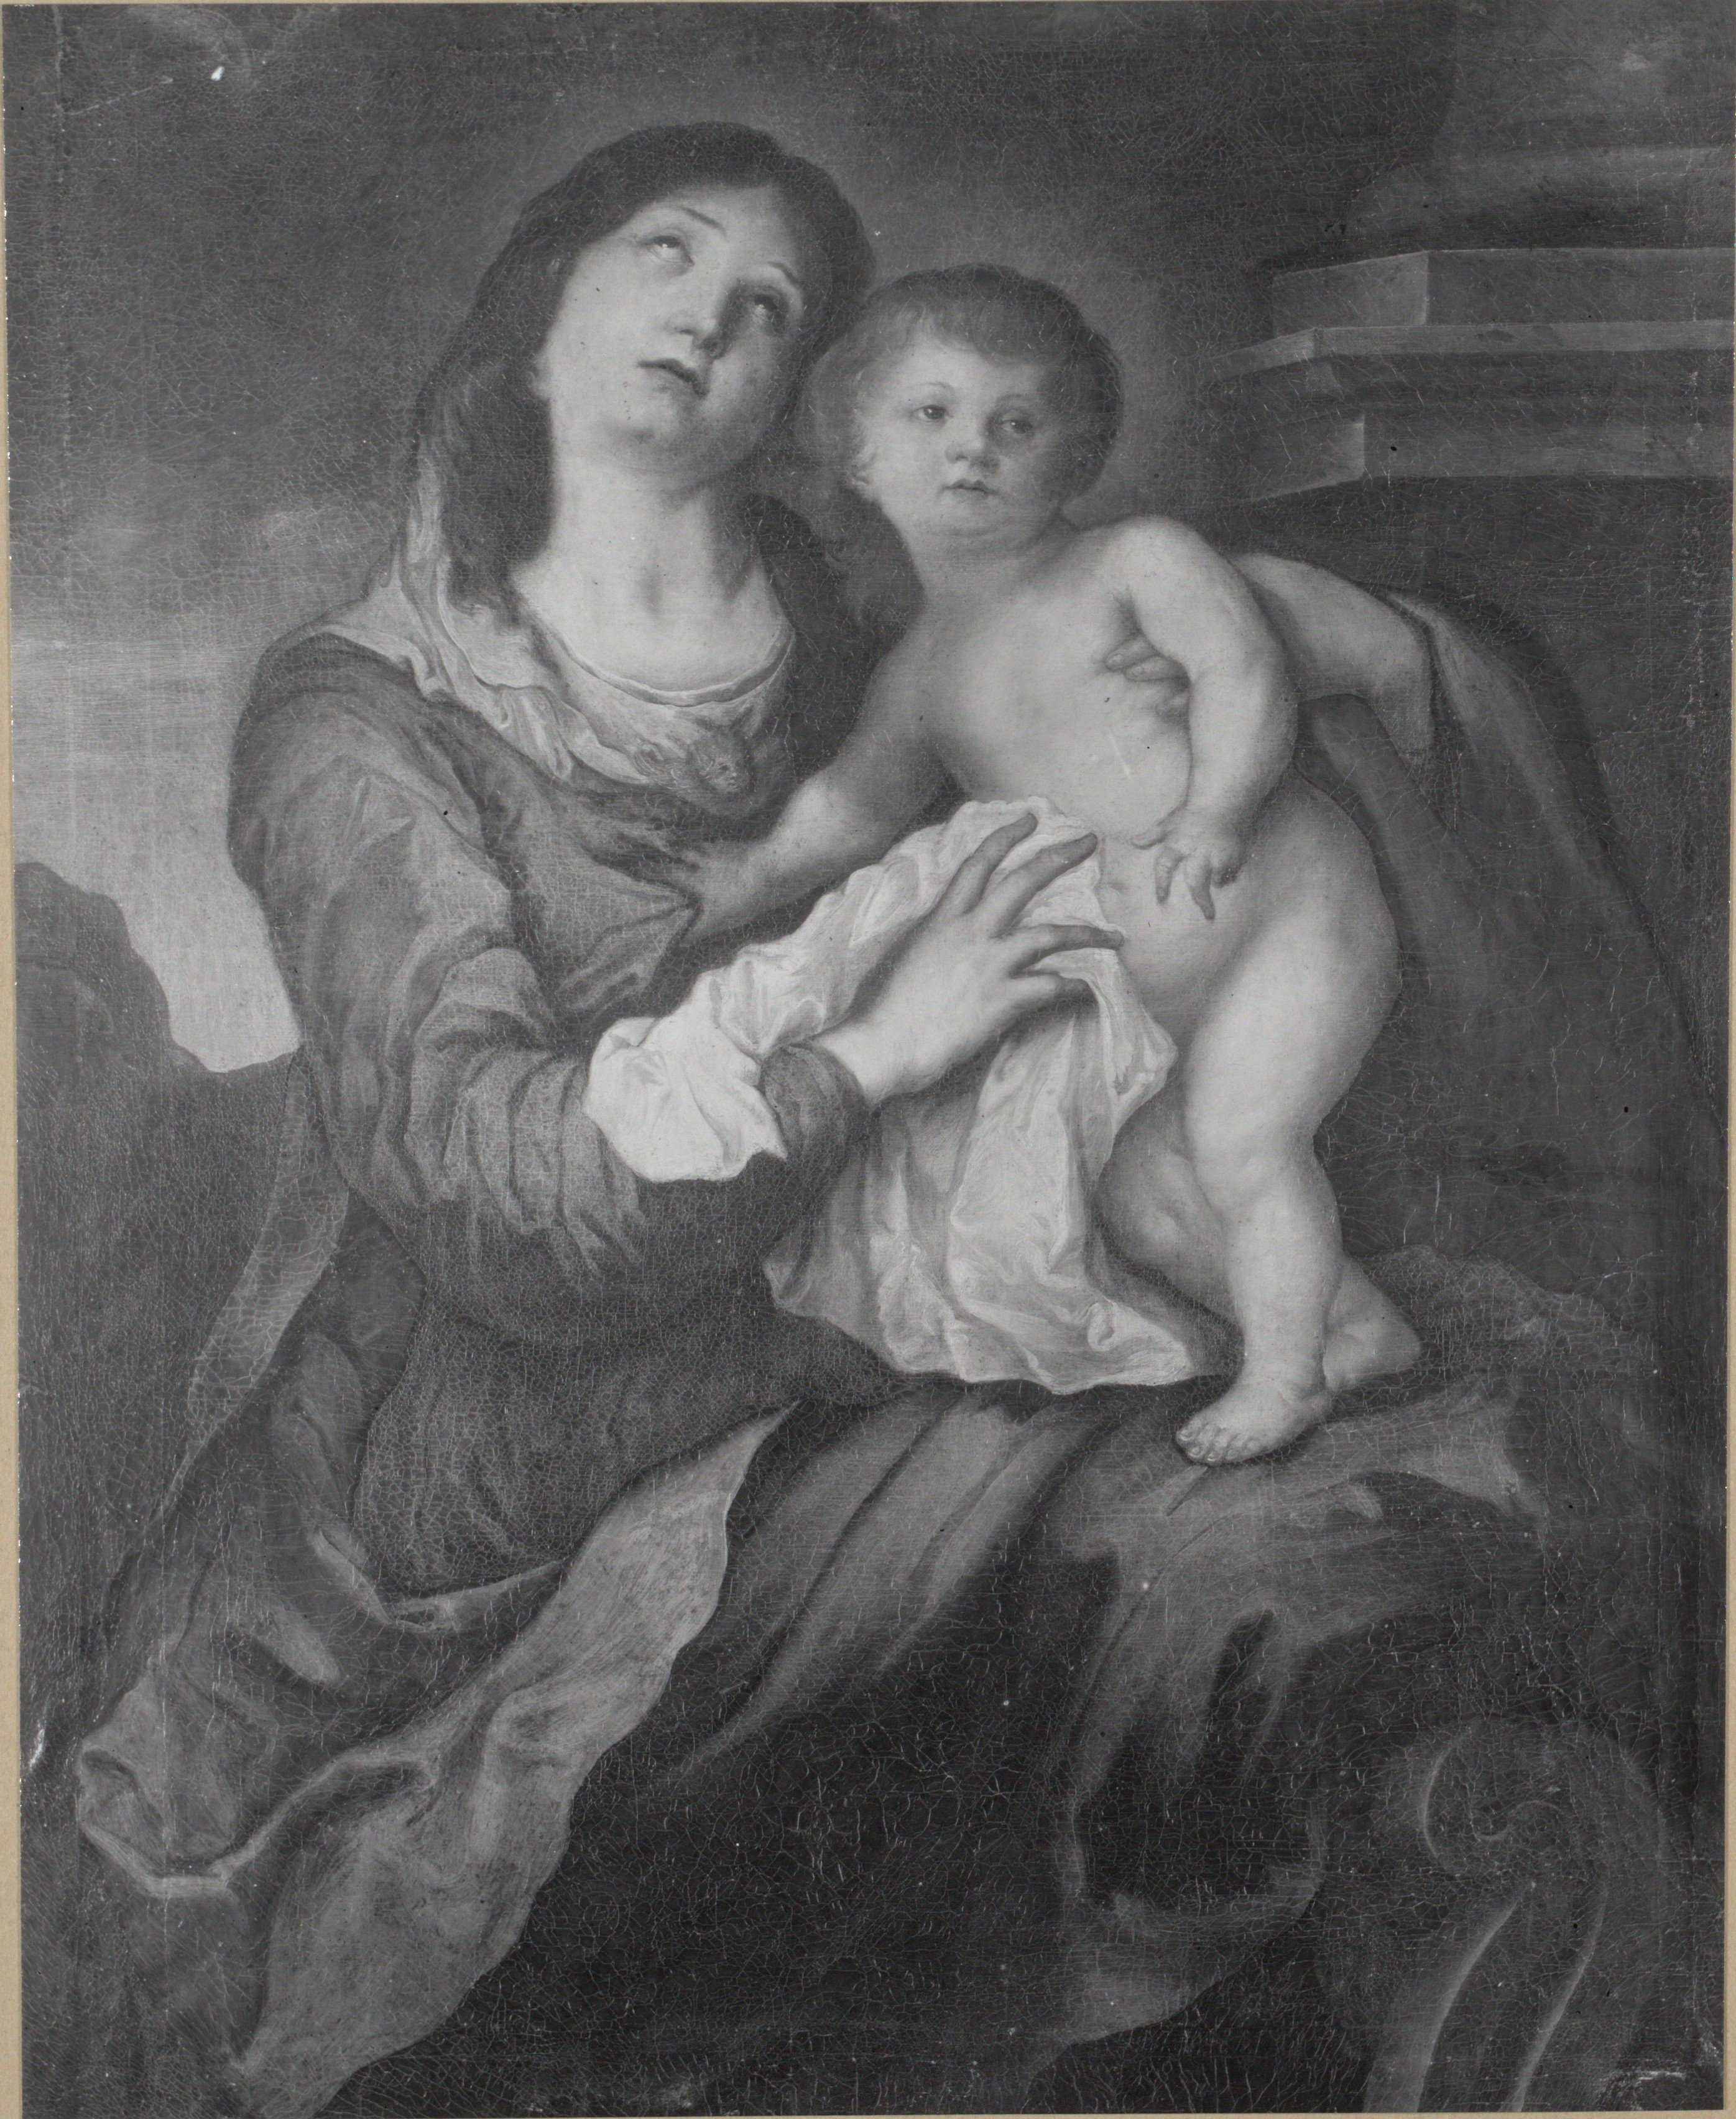

In [14]:
show_similars(train_test[train_test['set'] == 'test'][train_test['uid'].isin(list_downloaded)].sample(), embeddings, train_test, data)

In [9]:
import plotly.express as px
from umap import UMAP

umap_3d = UMAP(n_components=3, init='random', random_state=0)

features = np.vstack(embeddings[:,1])
proj_3d = umap_3d.fit_transform(features)

#fig_3d = px.scatter_3d(
#    proj_3d, x=0, y=1, z=2,
#)
#fig_3d.update_traces(marker_size=5)
#fig_3d.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.mplot3d import Axes3D

def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=zoom)

paths = embeddings[:,0]    

fig = plt.figure(figsize=(30,40))
ax = Axes3D(fig)
#ax = fig.add_subplot(projection='3d')
ax.scatter(proj_3d[:,0],proj_3d[:,1], proj_3d[:,2]) 

for x0, y0, z0, path in tqdm(zip(proj_3d[:,0],proj_3d[:,1], proj_3d[:,2],paths)):
    ab = AnnotationBbox(getImage(data_dir + 'subset/' + path + '.jpg'), (x0, y0, z0), frameon=False)
    ax.add_artist(ab)

In [12]:
proj_3d[:,0].shape

(4357,)